In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [68]:
# file4 = 'zillow/City_time_series.csv'
# raw4_df = pd.read_csv(file4)
# raw4_df.count() 3.76 million rows by 81 cols
# could not perform last operation

In [69]:
file5 = 'zillow/State_time_series.csv'
raw5_df = pd.read_csv(file5)
state_df = raw5_df.copy()
# group by state and return all time mean
statesall_mean = state_df.groupby(['RegionName'])['ZHVI_AllHomes'].mean()

# Avg Home Price of each State 
 [] a brief intro for state vs avg home price analysis before time series analysis on next section
 [] calculate average of total home prices per state and show on y_axis
 [] scatter final average number with states on x_axis

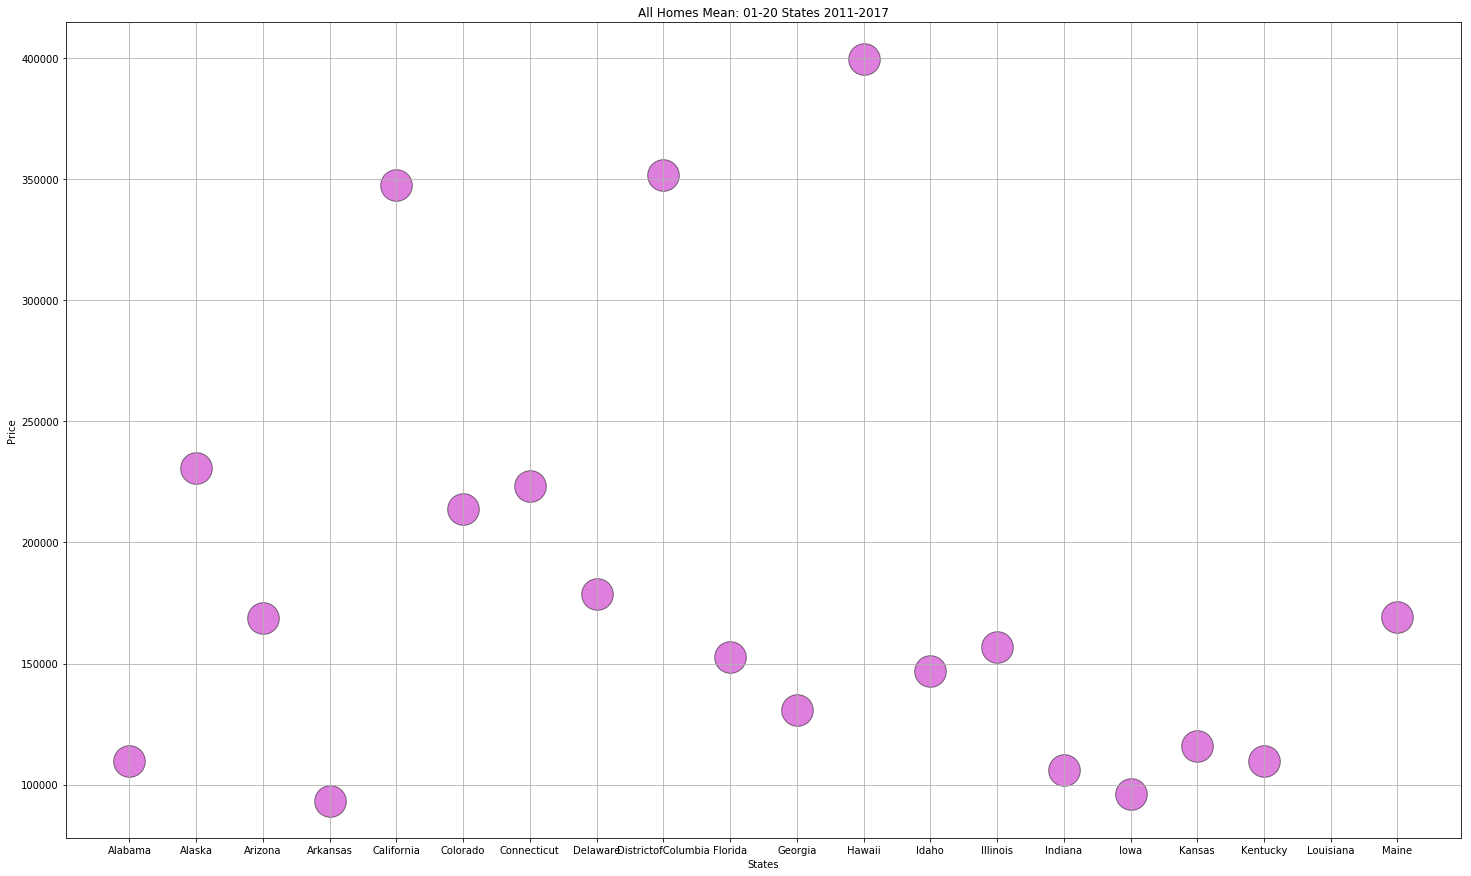

In [70]:
# scatter plot states 0-20 
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 01-20 States, All Years Final")
plt.scatter(statesall_mean.index[:20], statesall_mean[:20],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

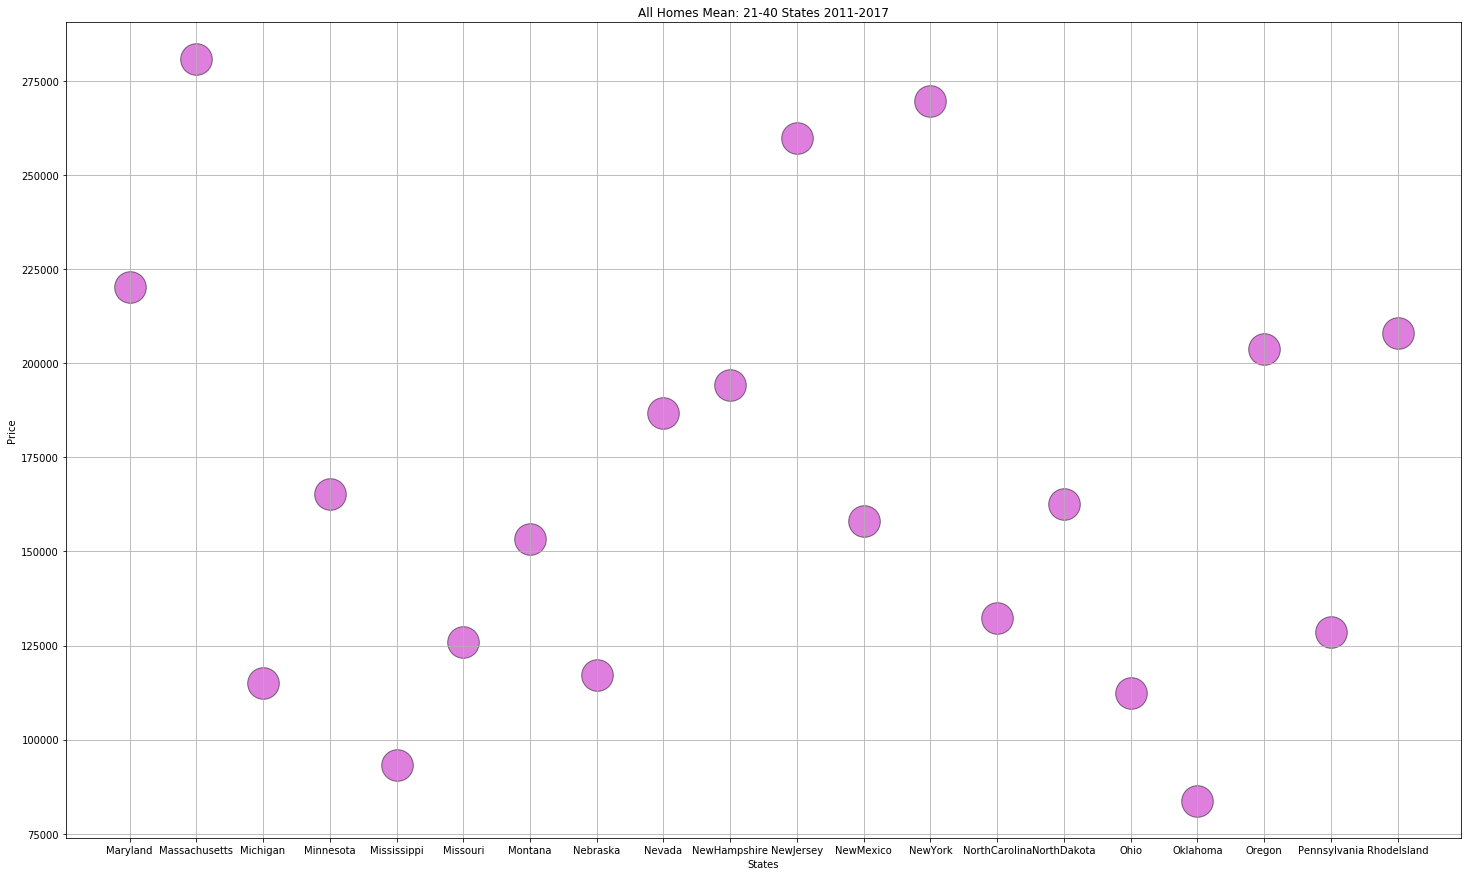

In [71]:
# scatter plot states 21-40
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 21-40 States 2011-2017")
plt.scatter(statesall_mean.index[20:40], statesall_mean[20:40],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

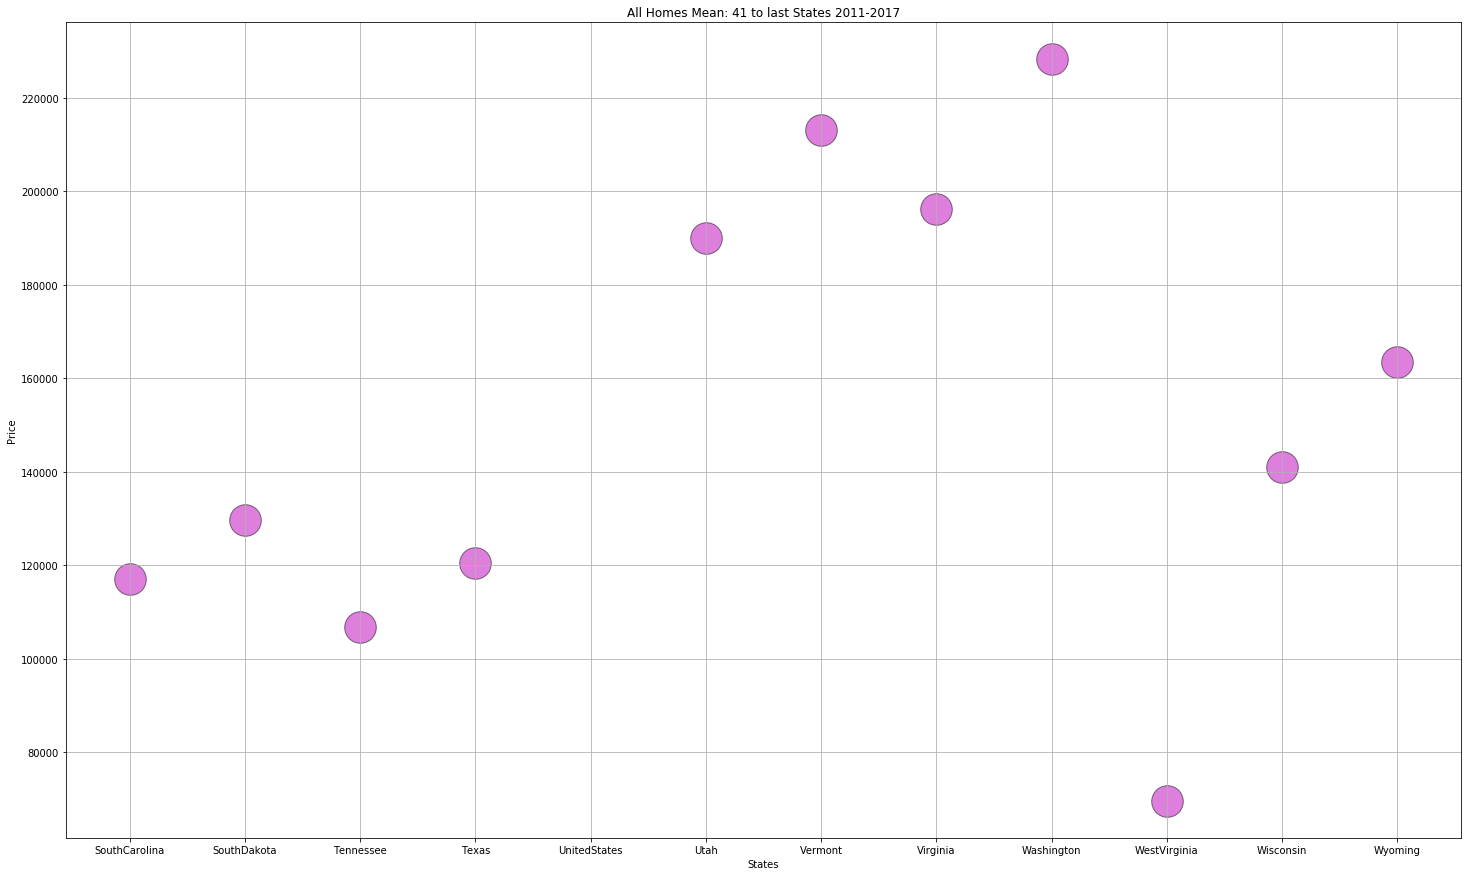

In [189]:
# scatter plot states 41-
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 41 to last States 2011-2017")
plt.scatter(statesall_mean.index[40:], statesall_mean[40:],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

# Data Visualization with Time Series Approach
     [] convert date (ie. 1996-04-30) to a date time format so target time period could be extracted
     [] extreme volatility on months not preferred thus analysis will be limited to years as per time period
     [] crucial library import datetime as dt

In [190]:
# Year needs to be extracted in order to determine increase per year
# state_df['Date'].head()
state_df['dt_Date'] = pd.to_datetime(state_df['Date'])
# state_df['dt_Date'].count() 13212
state_df['Year'] = state_df['dt_Date'].dt.year
# state_df['Year'] will be required for next groupby object

# state_df['Year'].unique()
# array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
#        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean() returns an array
dummyst = state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean()
stateMeanYear_df = dummyst.reset_index()
stateMeanYear_df
# pivoted the table with years on index, states on columns and average home price as values
stateMeanYear_pdf = stateMeanYear_df.pivot(index='Year', columns = 'RegionName', values = 'ZHVI_AllHomes')
stateMeanYear_pdf

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,79866.666667,NaN,104633.333333,64355.555556,157322.222222,129500.000000,132900.000000,108511.111111,NaN,86577.777778,...,71577.777778,NaN,NaN,128577.777778,NaN,112666.666667,135444.444444,39866.666667,NaN,NaN
1997,81358.333333,NaN,108308.333333,66833.333333,161108.333333,135083.333333,136050.000000,110466.666667,NaN,88908.333333,...,75366.666667,83254.545455,NaN,136891.666667,NaN,114633.333333,141700.000000,40833.333333,100900.000000,NaN
1998,84950.000000,175466.666667,113850.000000,69150.000000,172341.666667,142775.000000,141525.000000,113791.666667,NaN,92833.333333,...,80933.333333,86433.333333,NaN,142483.333333,NaN,117650.000000,150558.333333,43800.000000,104900.000000,99277.777778
1999,89475.000000,171400.000000,118933.333333,70075.000000,188500.000000,155775.000000,150075.000000,117200.000000,130114.285714,97658.333333,...,84633.333333,91733.333333,NaN,148733.333333,NaN,122183.333333,159308.333333,46391.666667,111566.666667,102333.333333
2000,91941.666667,174025.000000,127208.333333,72400.000000,215966.666667,174233.333333,163558.333333,124816.666667,144600.000000,105441.666667,...,87491.666667,95725.000000,NaN,157333.333333,NaN,129950.000000,168591.666667,48100.000000,116650.000000,109125.000000
2001,94416.666667,177375.000000,133191.666667,75600.000000,246400.000000,192341.666667,178516.666667,132100.000000,160516.666667,115341.666667,...,90458.333333,98808.333333,NaN,163075.000000,NaN,140033.333333,176533.333333,49575.000000,123833.333333,118100.000000
2002,96916.666667,181341.666667,140066.666667,77408.333333,280541.666667,201633.333333,199125.000000,143558.333333,200991.666667,127633.333333,...,92708.333333,102783.333333,NaN,165258.333333,NaN,152816.666667,184433.333333,51116.666667,129625.000000,123200.000000
2003,99858.333333,191516.666667,149425.000000,82000.000000,331108.333333,206975.000000,224916.666667,160091.666667,251116.666667,142716.666667,...,96500.000000,106958.333333,NaN,164841.666667,183375.000000,169416.666667,194700.000000,53916.666667,137375.000000,129966.666667
2004,105641.666667,208358.333333,165558.333333,87516.666667,410508.333333,212458.333333,251708.333333,179391.666667,309308.333333,166800.000000,...,100908.333333,115183.333333,NaN,167666.666667,204491.666667,198166.666667,212841.666667,56216.666667,142983.333333,142508.333333


# Avg Home Prices over Years per State
    [] draw a continuous line plot to show price change over the years of data
    [] plot average home price for each state by iteration through columns on same chart with legend
    [] divide states into four and show in four different figures for easy read    

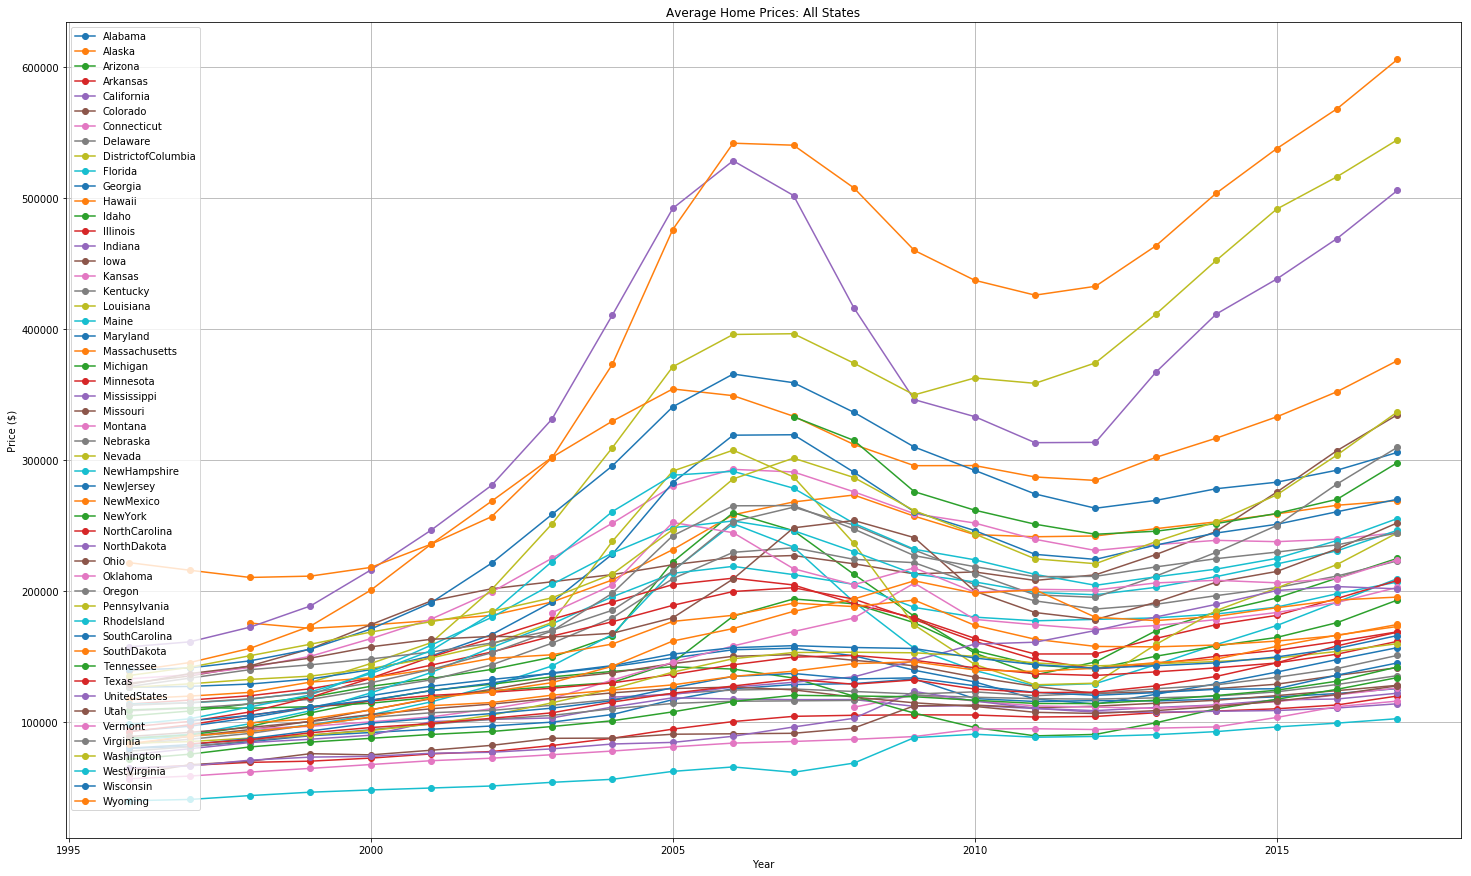

In [89]:
# pre-styling plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: All States")
plt.xlabel("Year")
plt.ylabel(" Price ($) ")

for state in stateMeanYear_pdf.columns:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], marker = 'o',label=state)
        plt.legend(loc='best')
plt.show()

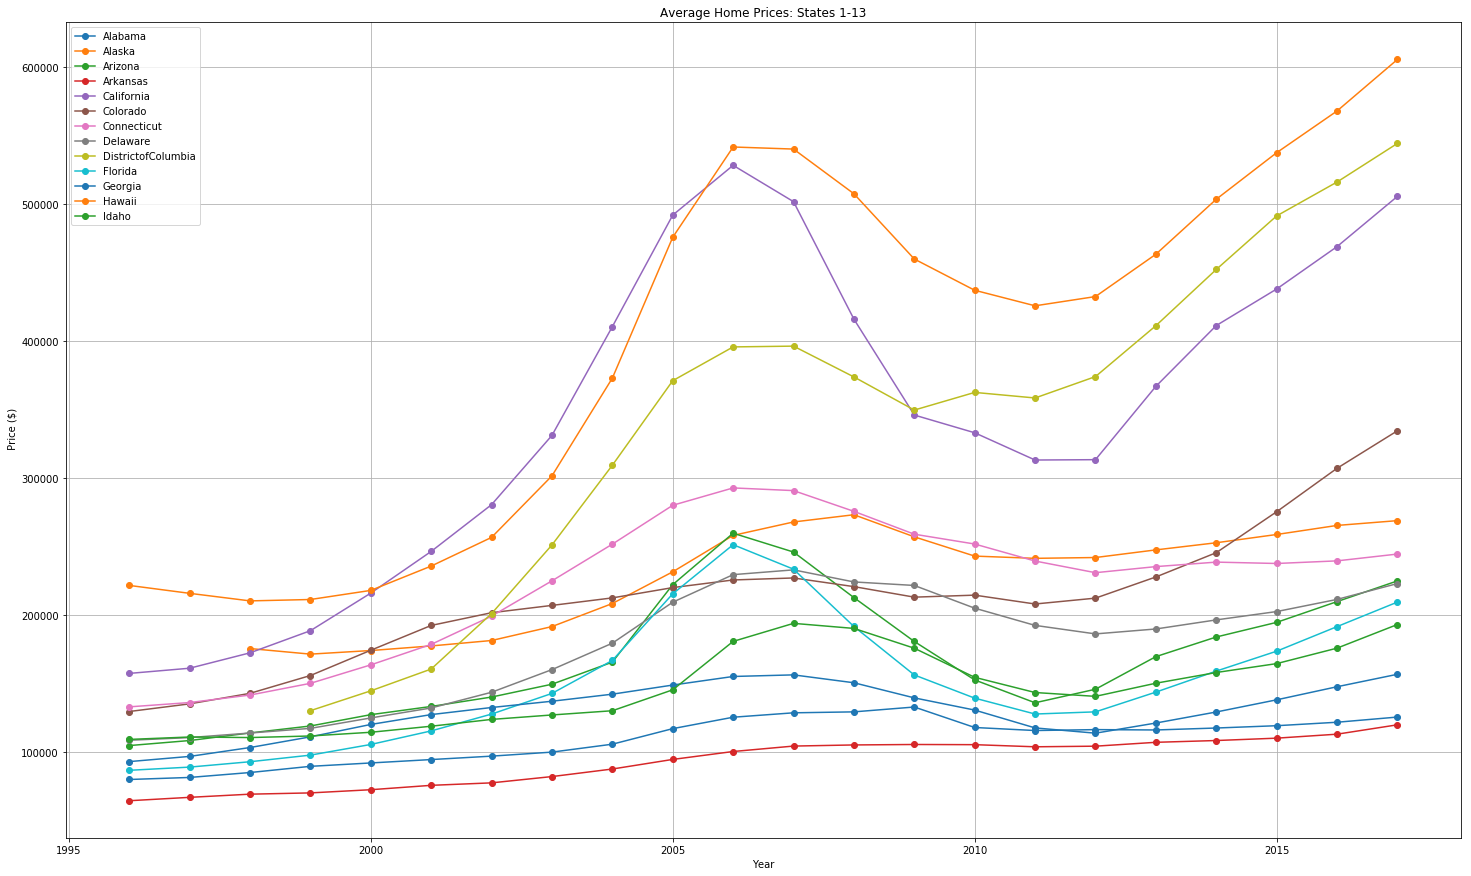

In [90]:
quarter_states = int(len(stateMeanYear_pdf.columns)/4)

plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 1-13")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[:quarter_states]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], marker = 'o',label=state)
        plt.legend(loc='best')
plt.show()

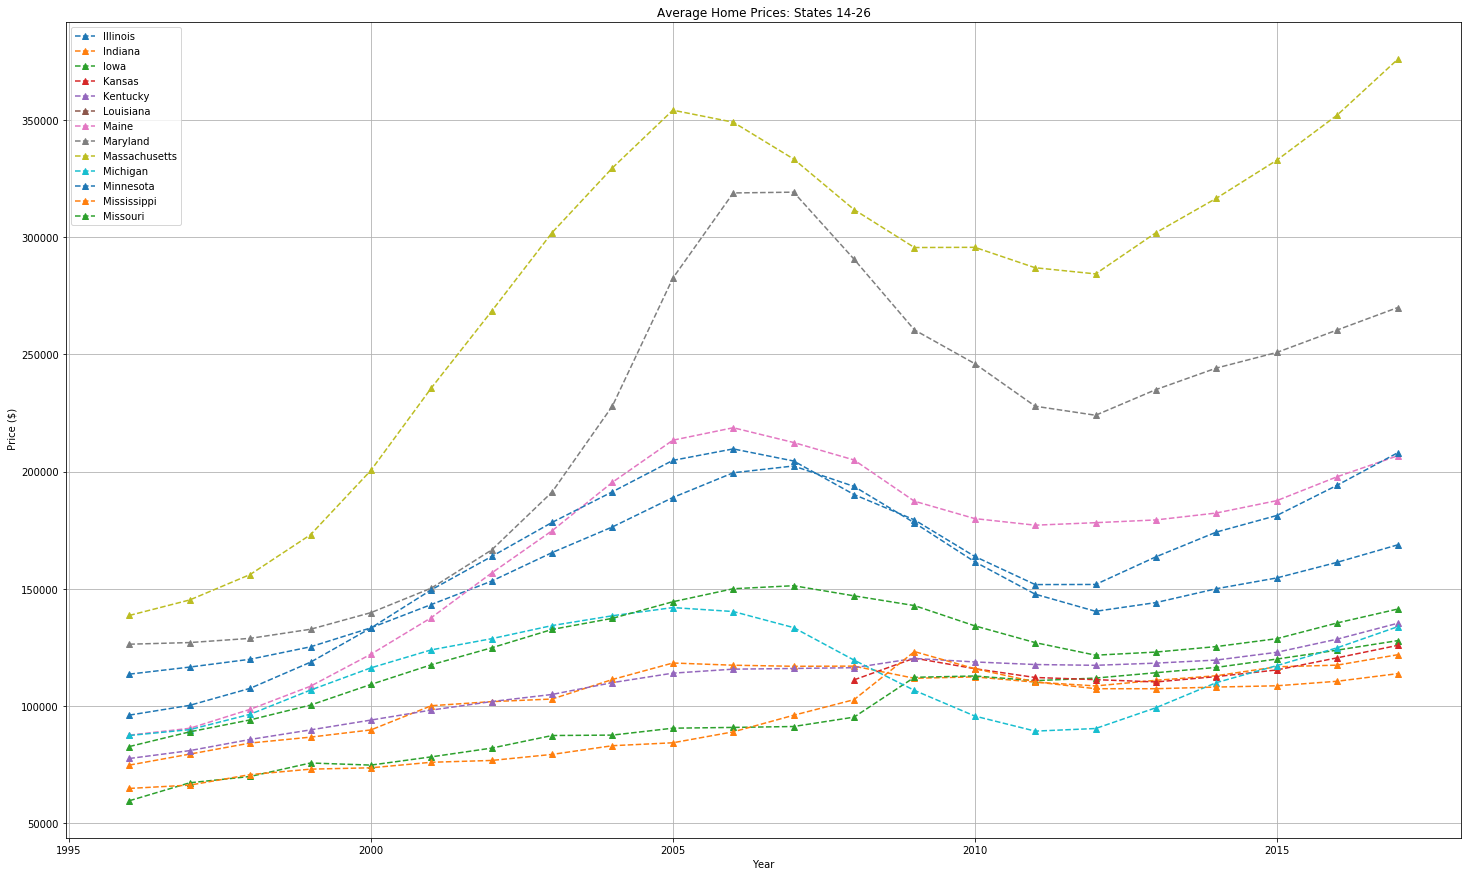

In [91]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 14-26")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[quarter_states:(quarter_states*2)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state],linestyle='--', marker = '^',label=state)
        plt.legend(loc='best')
plt.show()


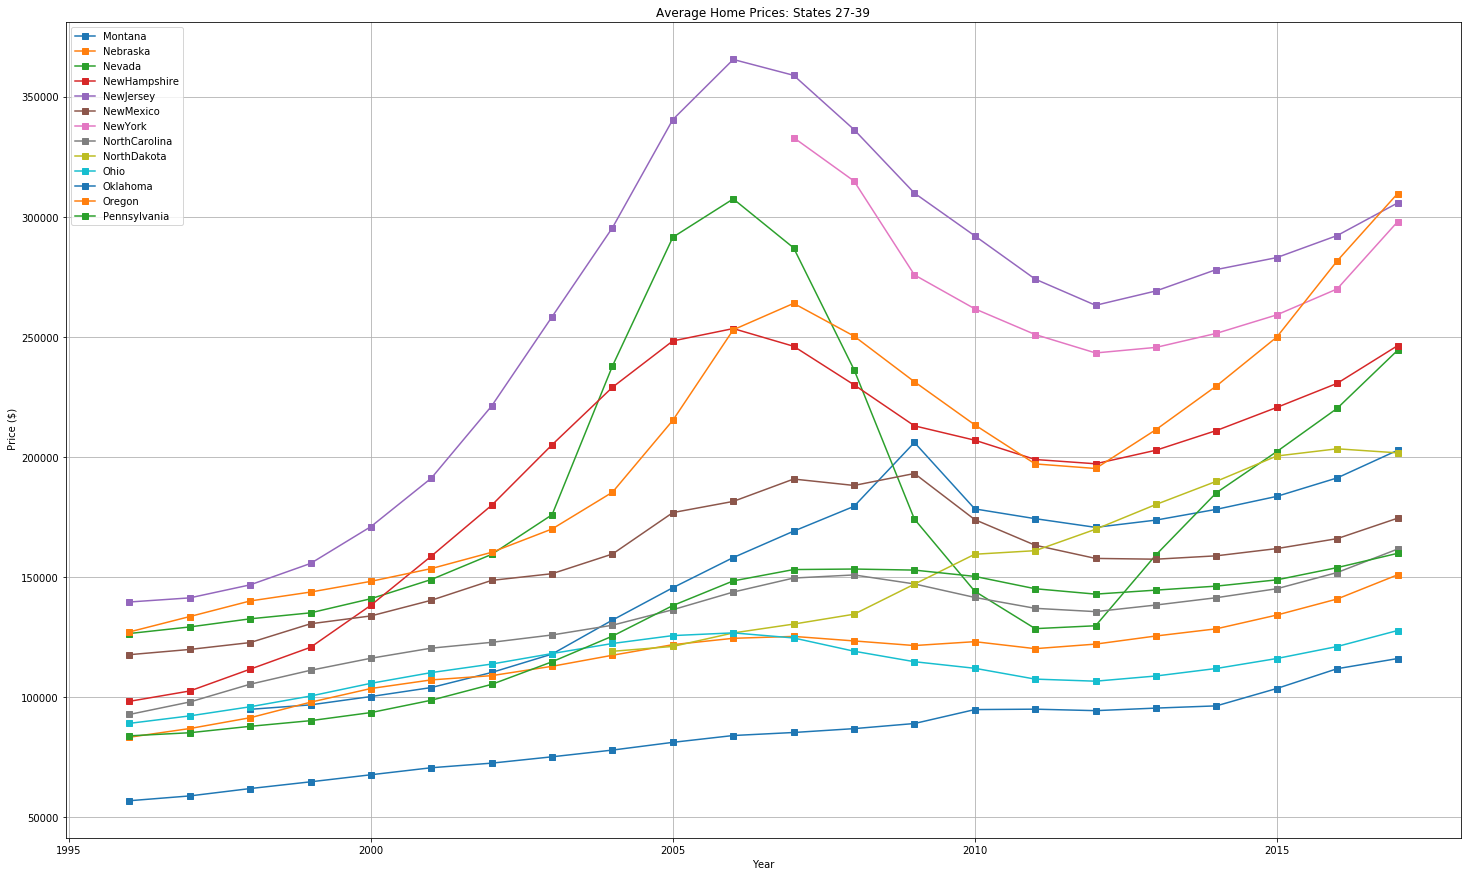

In [92]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 27-39")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[(2*quarter_states):(quarter_states*3)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linestyle='-', marker = 's',label=state)
        plt.legend(loc='best')
plt.show()

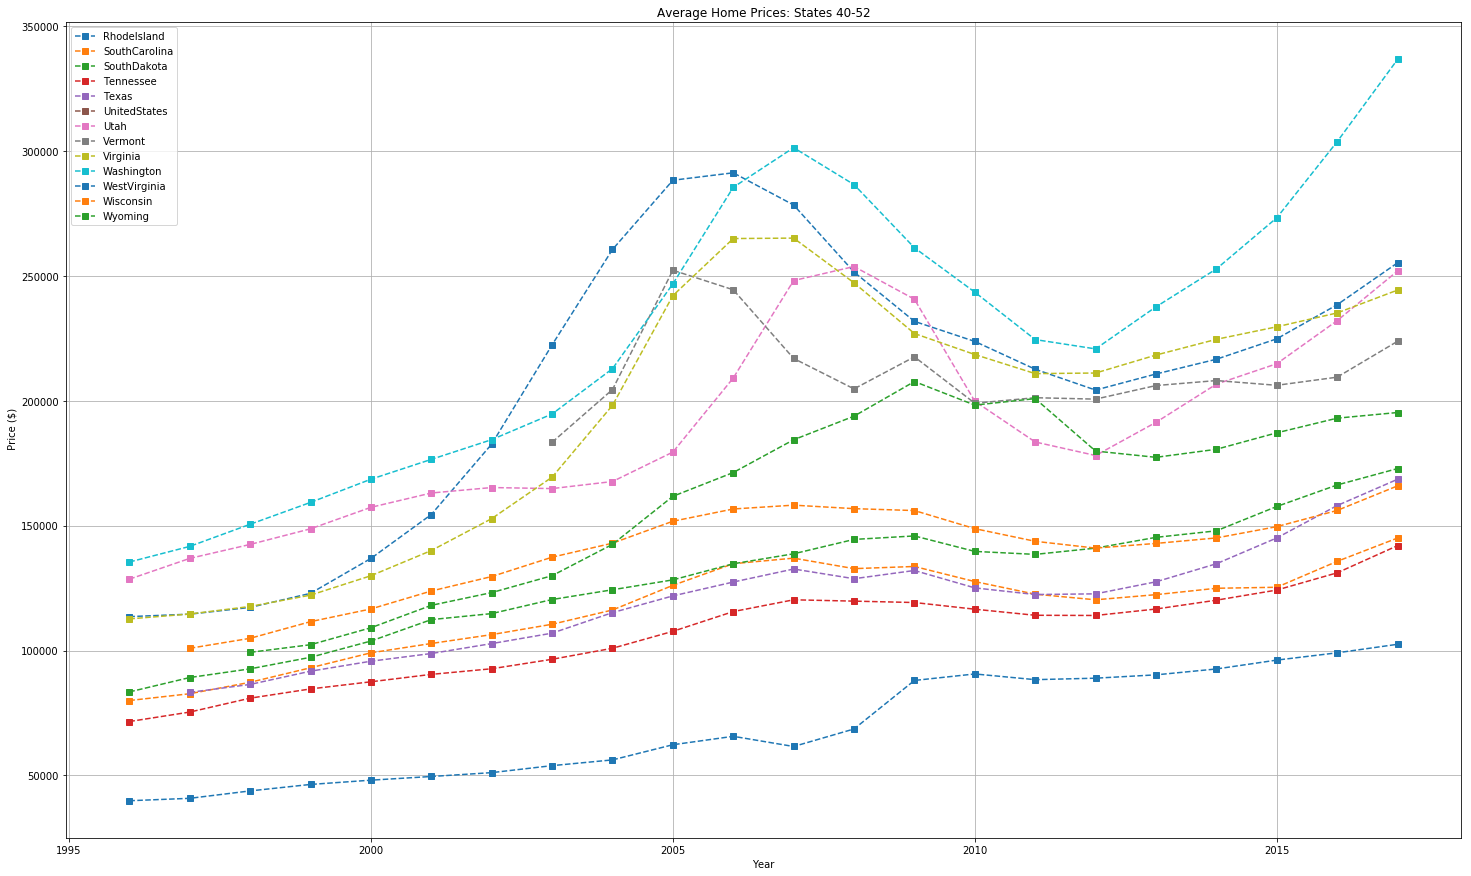

In [95]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 40-52")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[(3*quarter_states):(quarter_states*4)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linestyle='--', marker = 's',label=state)
        plt.legend(loc='best')
plt.show()

In [96]:
# type(stateMeanYear_pdf.mean().sort_values(ascending=False)) returns series
stateavgsorted_list = stateMeanYear_pdf.mean().sort_values(ascending=False)
stateavgsorted_listTT = stateavgsorted_list[:11]
stateavgsorted_listTTindex = stateavgsorted_listTT.index[:11]
stateavgsorted_listTTindex
# stateavgsorted_listTT

Index(['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts',
       'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut',
       'Maryland', 'Colorado'],
      dtype='object', name='RegionName')

In [ ]:
# Home

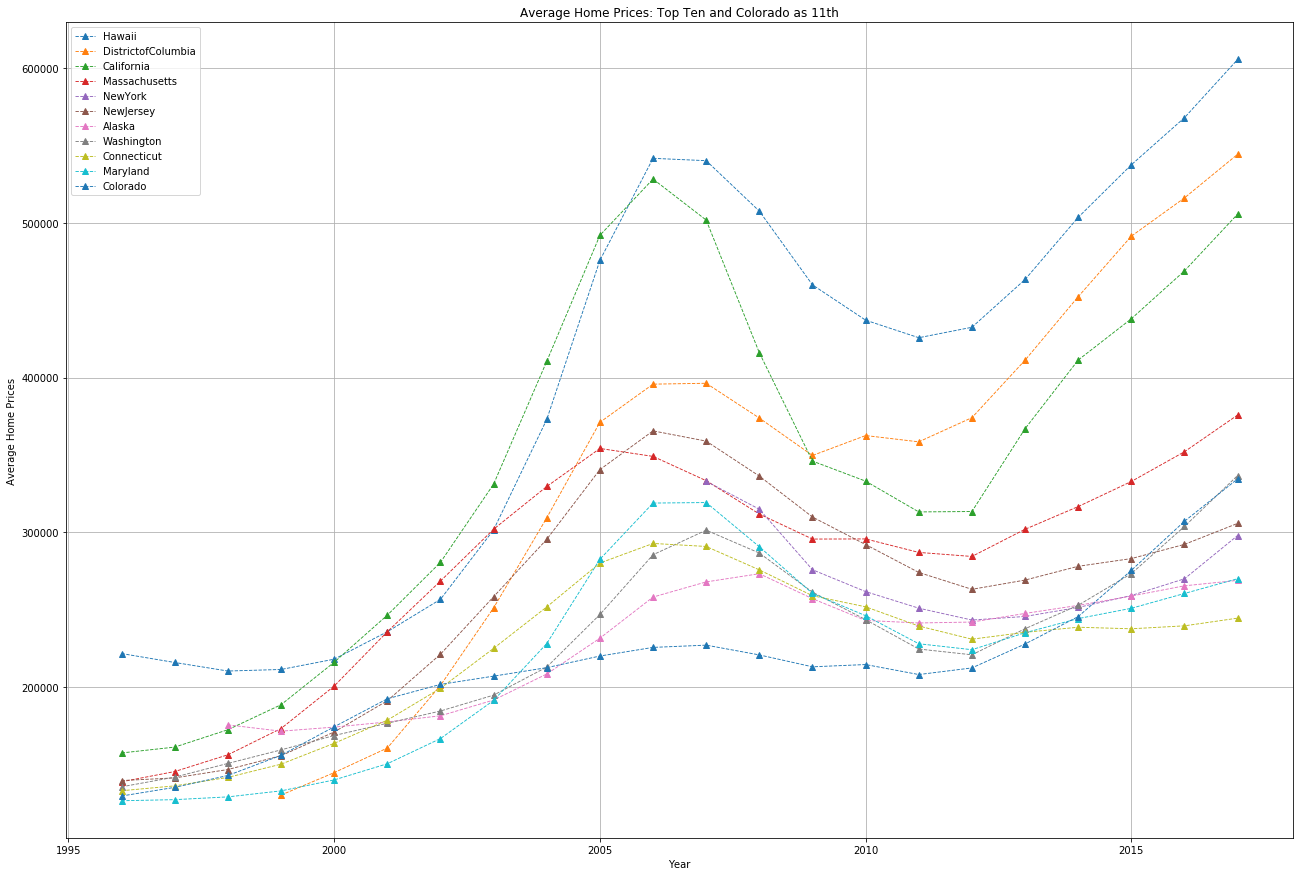

In [186]:
# pre-styling plot
plt.figure(figsize=(22,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: Top Ten and Colorado as 11th")
plt.xlabel("Year")
plt.ylabel(" Average Home Prices ")

stateMeanYear_TTpdf =stateMeanYear_pdf[['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut', 'Maryland', 'Colorado']]
for state in stateMeanYear_TTpdf.columns:
    plt.plot(stateMeanYear_TTpdf.index, stateMeanYear_TTpdf[state], linewidth = 0.9,linestyle ='--', marker = '^',label=state)
    plt.legend(loc='best')
plt.show()

# Rate Comparison of States
    [] copy prices_df and transform into a dataframe consisting of rates for change with respect to last years prices
    [] create a bar chart with top ten states with highest home price increase (mean) over the years of data span

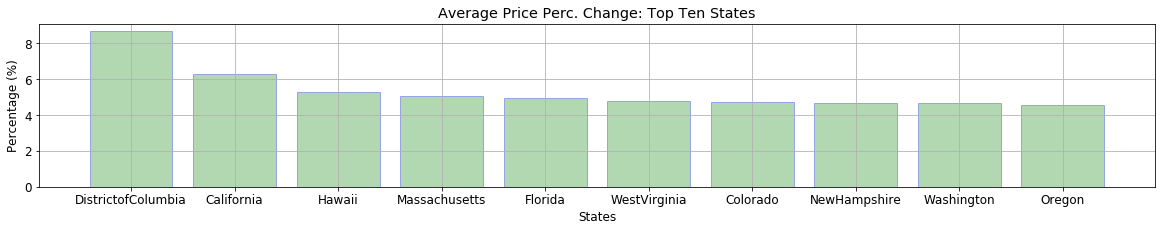

In [185]:
stateperc_df = stateMeanYear_pdf.pct_change()
stateperc_list = stateperc_df.mean()

# plot top ten staets with highest all-time increase
stateperc_TTlist = stateperc_list.sort_values(ascending=False)[:10]
stateperc_TTlist=stateperc_TTlist*100
# pre-styling scatter plot
plt.figure(figsize=(20,3))
plt.rcParams["font.size"] = 12
plt.grid()
plt.title("Average Price Perc. Change: Top Ten States")
plt.xlabel("States")
plt.ylabel("Percentage (%)")
plt.bar(stateperc_TTlist.index,stateperc_TTlist, color = 'g', edgecolor = 'b' , alpha = 0.3)
plt.show()

# Data Visualization Cont'd: Colorado vs Overall
    [] create a bar chart with line plot for Colorado vs Overall Avg in home percentage price change
    [] define a function for similar analysis in below sections of the team project (ie. median, rental etc.)   

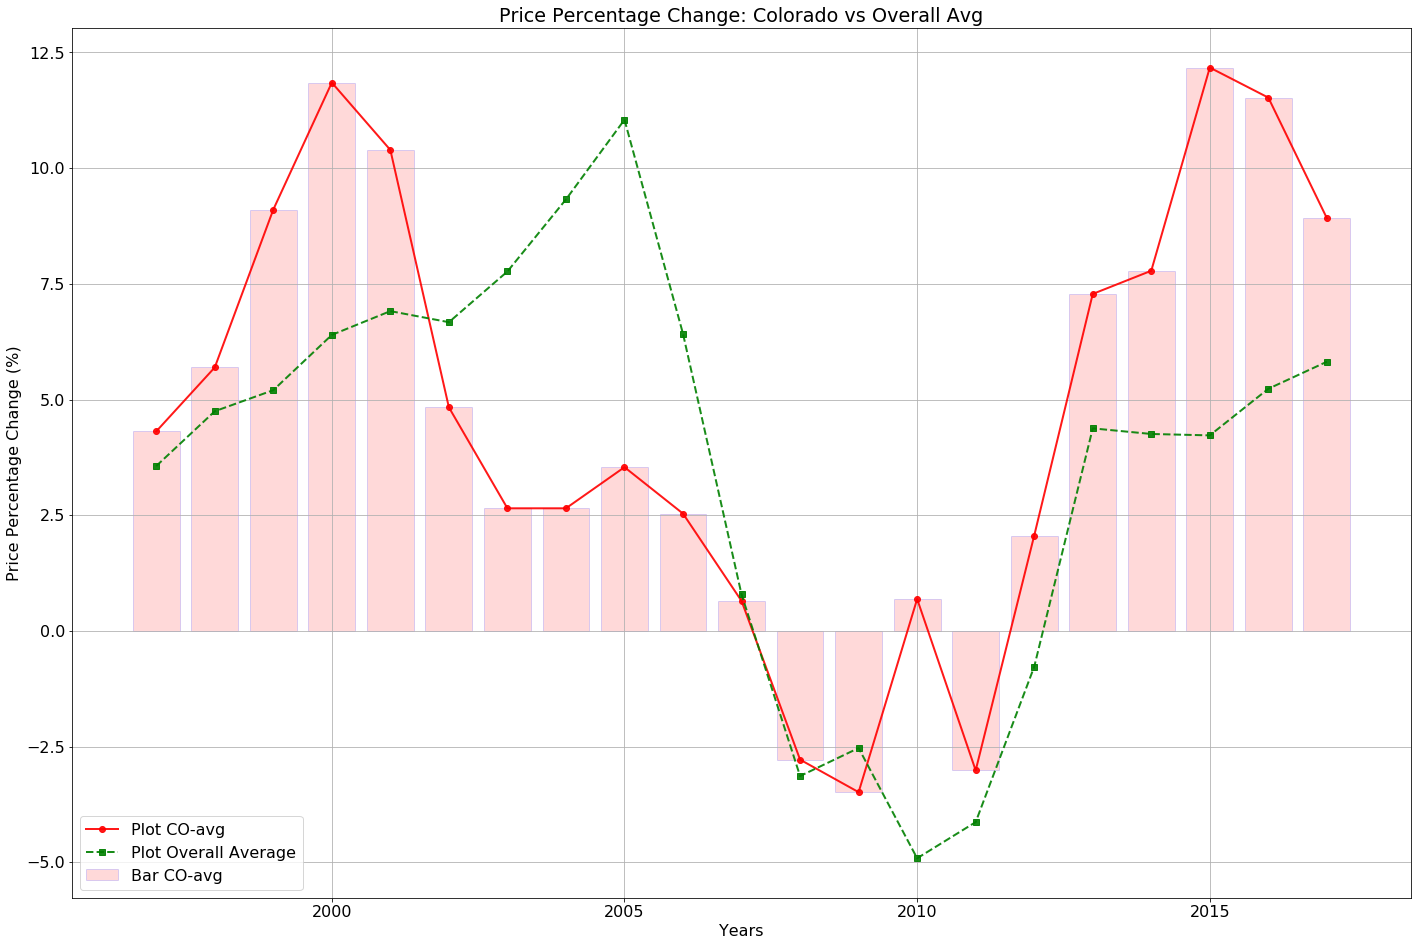

In [266]:
plt.figure(figsize=(24,16))
plt.rcParams["font.size"] = 16
plt.grid()
plt.title("Price Percentage Change: Colorado vs Overall Avg")
plt.xlabel("Years")
plt.ylabel("Price Percentage Change (%)")
plt.bar(stateperc_df.index,stateperc_df['Colorado']*100, color = 'r', edgecolor = 'b' , alpha = 0.15, align='center', label='Bar CO-avg')
plt.plot(stateperc_df.index,stateperc_df['Colorado']*100, color = 'r', linewidth= 2,   marker = 'o', alpha = 0.90, label='Plot CO-avg')
plt.plot(stateperc_df.index,stateperc_df.mean(axis=1)*100, color = 'g', linewidth= 2,linestyle='--', marker = 's', alpha = 0.90, label='Plot Overall Average')
plt.legend(loc='best')
plt.show()

# defining a function:
        [] define a function to create similar charts with different data for next sections
        [] parameters required for above function: 
        def BarLine_vsAvg_onYears(pivoted_Tdf,state,ylabel):
        - pivoted_Tdf: a pivoted-Transposed dataframe with states placed on columns and years on index then transpose
        - state: a state (column) to be compared to overall average
        - ylabel:  a field whose values will be used for comparison, mostly dollar amount (ie. price, rent, fee etc.)

In [257]:
def BarLine_vsAvg_onYears(pivoted_Tdf,state,ylabel):
    plt.figure(figsize=(24,16))
    plt.rcParams["font.size"] = 16
    plt.grid()
    plt.title(state + " vs Overall Average")
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.bar(pivoted_Tdf.index,pivoted_Tdf[state], color = 'c',  alpha = 0.35, align='center', label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf[state], color = 'b', linewidth= 1,   marker = 'o', alpha = 0.90, label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1), color = 'g', linewidth= 2, linestyle ='--', marker = 's', alpha = 0.90, label='Overall Avg')
    plt.legend(loc='best')
    plt.show()

        [] modify above function for percentage output when comparing rates

In [258]:
def BarLine_vsAvg_onYears_Perc(pivoted_Tdf,state,ylabel):
    plt.figure(figsize=(24,16))
    plt.rcParams["font.size"] = 16
    plt.grid()
    plt.title(state + " vs Overall Average")
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.bar(pivoted_Tdf.index,pivoted_Tdf[state]*100, color = 'r',  alpha = 0.15, align='center', label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf[state]*100, color = 'r', linewidth= 2,   marker = 'o', alpha = 0.90, label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1)*100, color = 'g', linewidth= 2, linestyle ='--', marker = 's', alpha = 0.90, label='Overall Avg')
    plt.legend(loc='best')
    plt.show()

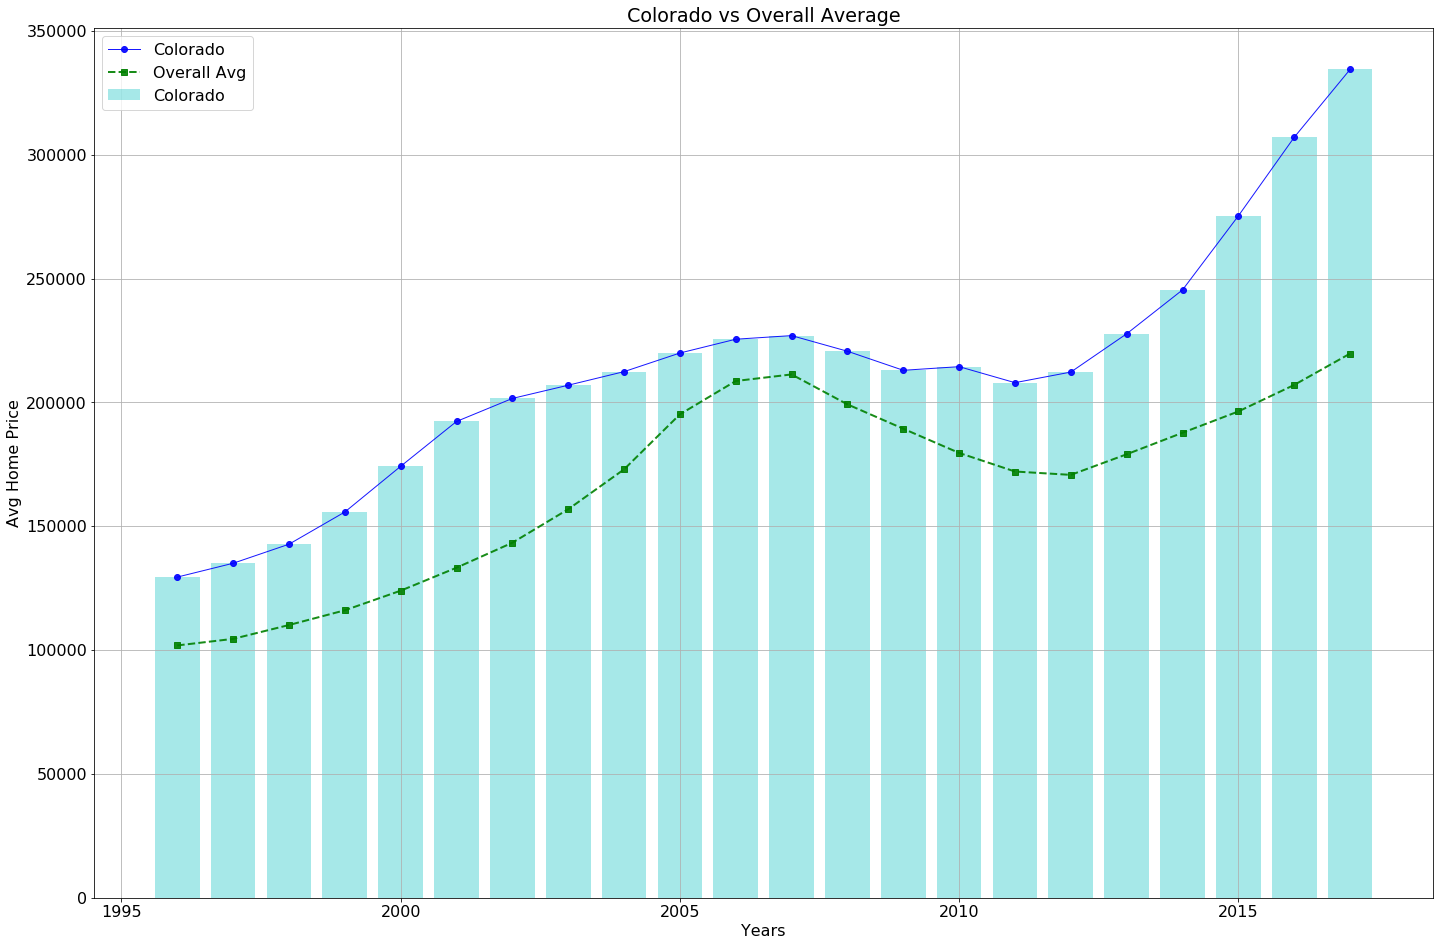

In [315]:
# test function with below states
# BarLine_vsAvg_onYears_Perc(pivoted_Tdf=stateperc_df,state='Utah',ylabel='Price Perc Rate')
BarLine_vsAvg_onYears(pivoted_Tdf=stateMeanYear_pdf,state='Colorado',ylabel='Avg Home Price')

# How about rent ?
        [] create all required parameters to run a function thus state (CO) vs Overall comparison could be made:
            (1) pivotedT_df (2)state (3) ylabel -values-

In [292]:
# narrowing down our scope on extracted fields/columns below
rental_df = state_df[['RegionName','MedianRentalPrice_AllHomes','Year']]
# pivoting dataframe
rentalpivoted_Tdf = rental_df.groupby(['Year','RegionName'])['MedianRentalPrice_AllHomes'].mean().reset_index().pivot(index='Year', columns = 'RegionName', values = 'MedianRentalPrice_AllHomes')
rentalpivoted_Tdf.head()
# drop all those array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007, 2008, 2009]
# all NaN and partially NaN on 2010 row
rentalpivoted_Tdf.head()

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# define a function:
        [] purpose of this function will be plotting set of chosen states to compare for analysis
        [] parameters required for above function: 
        def PlotStateList(pivoted_Tdf,states_list,ylabel):
        - pivoted_Tdf: a pivoted-Transposed dataframe with states placed on columns and years on index then transpose
        - states_list: those in the list will be plotted for comparison
        - ylabel:  a field whose values will be used for comparison, mostly dollar amount (ie. price, rent, fee etc.)

In [361]:
def PlotStateList(pivoted_Tdf,states_list,ylabel):
    plt.figure(figsize=(25,15))
    plt.rcParams["font.size"] = 16
    plt.grid(True)
    plt.title(ylabel)
    plt.xlabel("Years")
    plt.ylabel(ylabel)

    for state in states_list:
        plt.plot(pivoted_Tdf.index, pivoted_Tdf[state], linestyle='--', marker = 'o',label=state)
        plt.legend(loc='best')
        
    plt.bar(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1), color = 'g',  alpha = 0.30, align='center', label = 'Average All States')
    plt.legend(loc='best')
    plt.show()

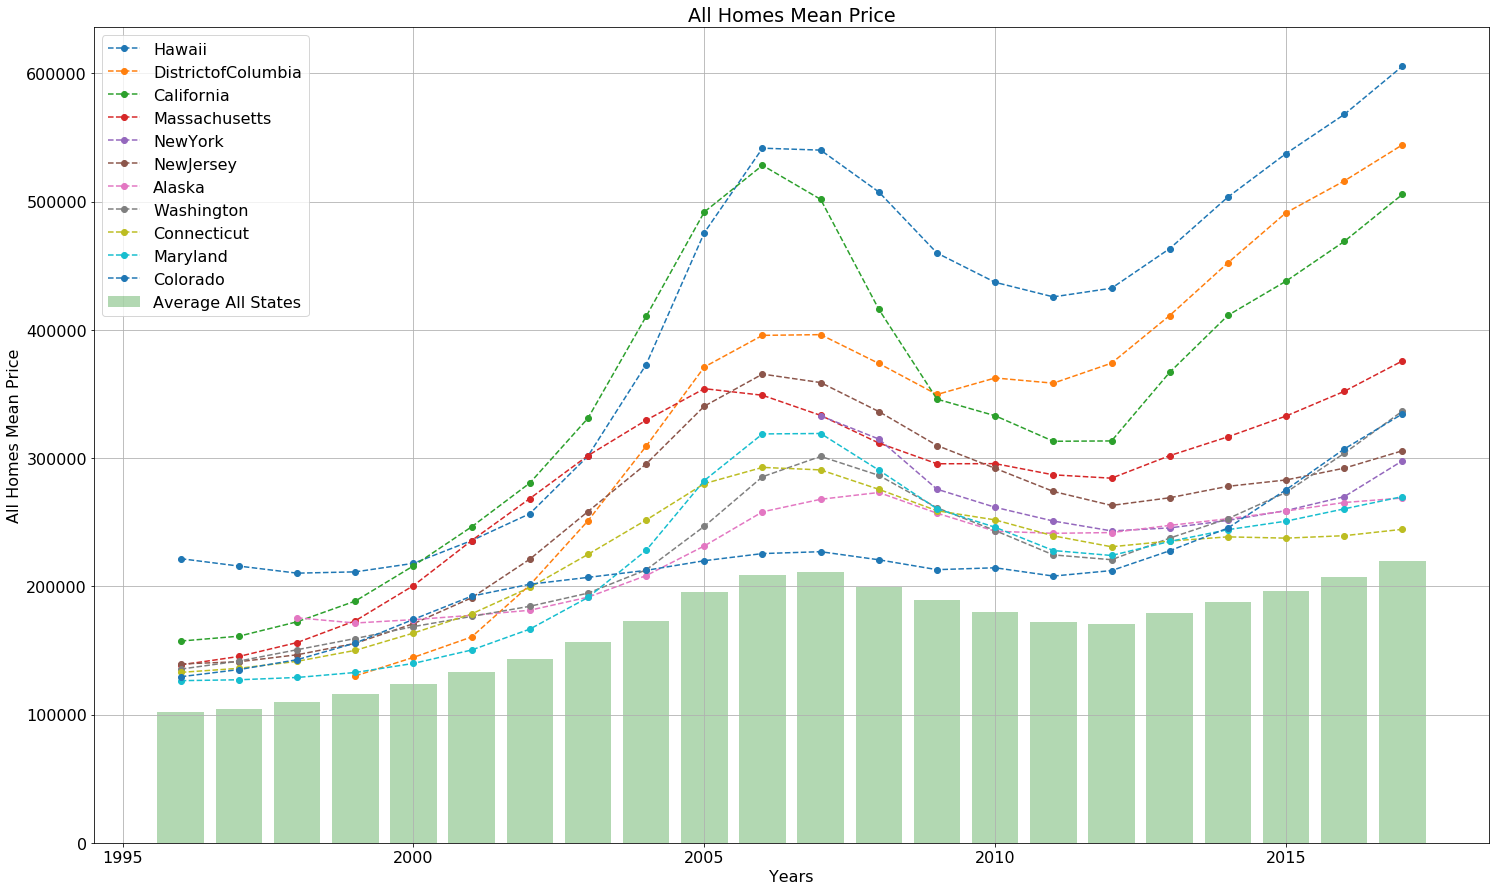

In [363]:
# test run with TopTenStates above created
TopTenStates_list = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut', 'Maryland', 'Colorado']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf,states_list =TopTenStates_list,ylabel='All Homes Mean Price')

# Is it legalization of recreational use and dispensaries?

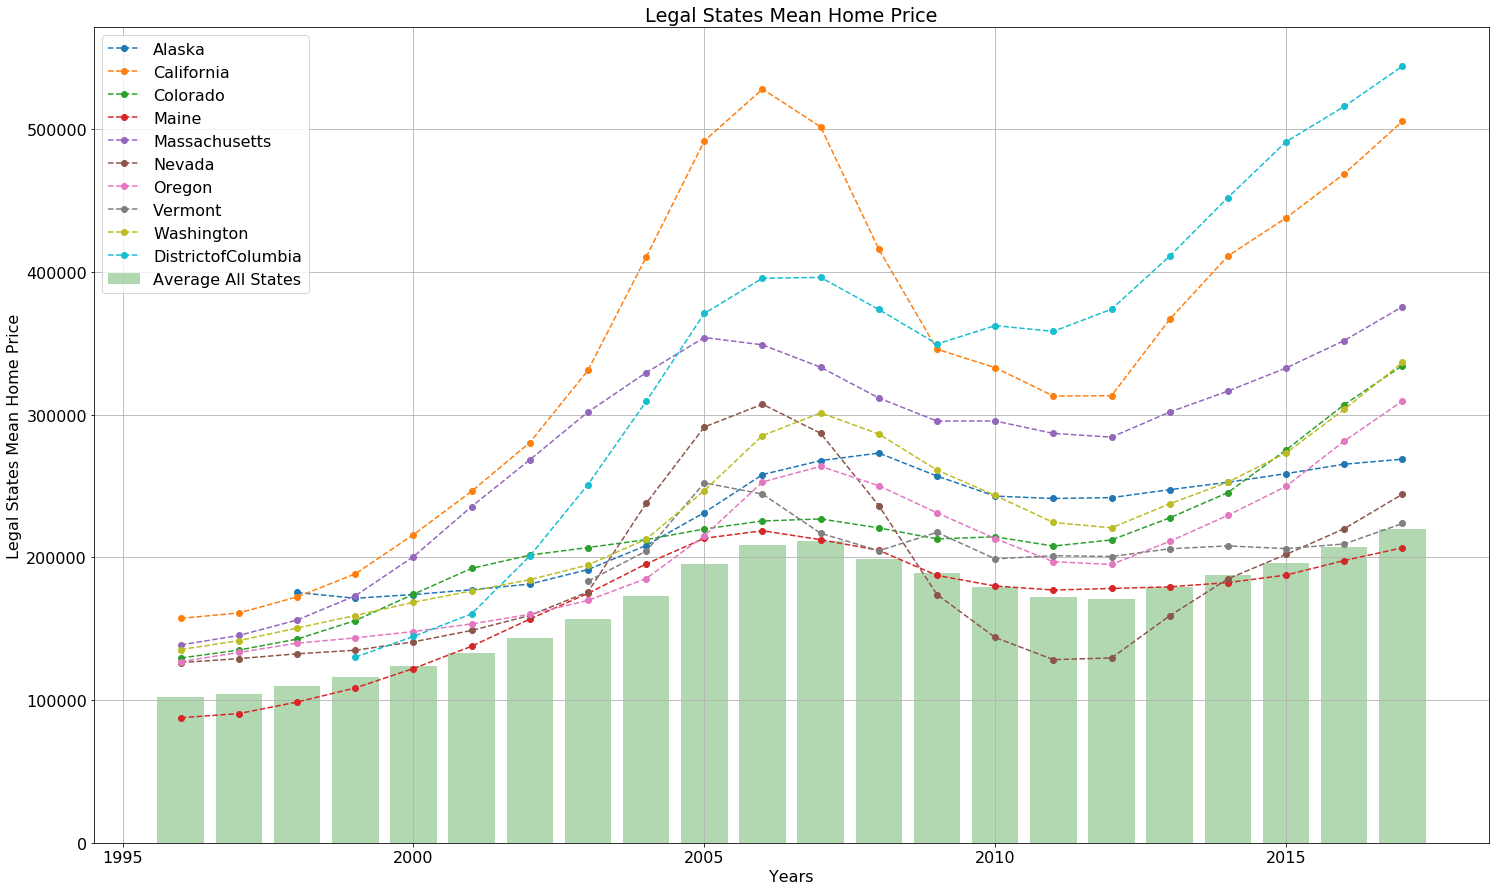

In [364]:
# The recreational use of cannabis is legal in 9 states 
LegalStates_list = ['Alaska', 'California', 'Colorado', 'Maine', 'Massachusetts', 'Nevada', 'Oregon', 'Vermont', 'Washington', 'DistrictofColumbia']

PlotStateList(pivoted_Tdf=stateMeanYear_pdf,states_list =LegalStates_list,ylabel='Legal States Mean Home Price')

# CO's bordering states: are they as popular?

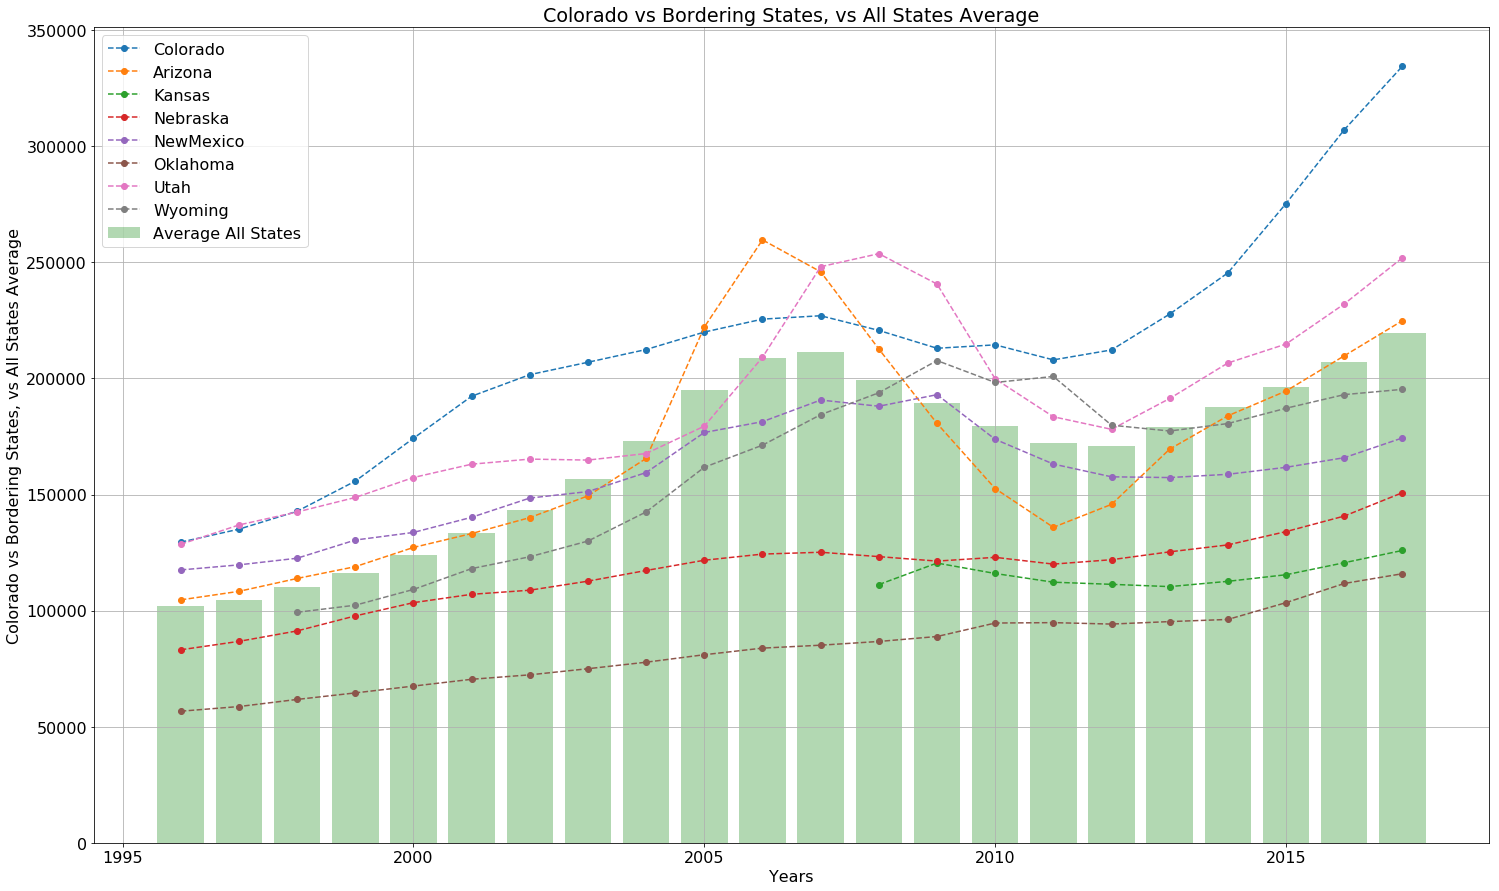

In [365]:
borderingstates_list = ['Colorado', 'Arizona', 'Kansas', 'Nebraska', 'NewMexico', 'Oklahoma', 'Utah', 'Wyoming']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf,
              states_list =borderingstates_list,
              ylabel='Colorado vs Bordering States, vs All States Average')

In [22]:
# Dependencies\n",
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime as dt
import string as s

#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process

In [23]:
# Load in File from resources - data source = https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-counts\n",
file = 'MASTER_TRAFFIC_COUNT.csv'

In [25]:
# Read and display preview with pandas\n",
df = pd.read_csv(file)
df_clean = df.dropna(axis=1, how='all')
df_clean = df_clean.drop(['Locator', 'Dir', 'Amount of traffic in the directional movement', 'Unnamed: 20', 'Unnamed: 254'], axis=1)
df_clean.head()

C:\Users\BranD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Main Location,Second Location,Last day of the study,Morning AM Peak Hourly Volume,Evening PM Peak Hourly Volume,Annual Daily Traffic,Average Weekday Traffic,Average Weekend Traffic,Master ID
0,EMERSON ST,EXPOSITION AVE,10/20/2011,NaN,NaN,NaN,NaN,NaN,NaN
1,S DAYTON ST,E KENTUCKY DR & E OHIO AVE,9/25/2015,320.0,445.0,NaN,5588,NaN,15693.0
2,S STEELE ST,E ARKANSAS AVE & E LOUISIANA AVE,10/30/2015,326.0,317.0,NaN,3366,NaN,7922.0
3,W MISSISSIPPI AVE,S SANTA FE DRIVE,11/2/2006,1157.0,1030.0,NaN,NaN,NaN,NaN
4,W MISSISSIPPI AVE,S SANTA FE DRIVE,11/2/2006,748.0,941.0,NaN,NaN,NaN,NaN


In [26]:
#Avg Weekday Traffic is mostly complete from Nov 2015 to Mar 2011\n",
    #AM and PM are continuous throughout
    

#covert date column into date time object
#df_clean['Last day of the study'].dtype

#convert date column from date string to a date/time object\n",
df_clean['Date Time'] = pd.to_datetime(df_clean['Last day of the study'])

df_clean['Month'] = df_clean['Date Time'].dt.month
df_clean['Month'] = df_clean['Month'].map('{:02d}'.format)
df_clean['Year'] = df_clean['Date Time'].dt.year
df_clean['Year-Month'] = df_clean["Year"].map(str) + '-' + df_clean["Month"].map(str)
df_clean.head()
df_clean['Date Time'].dtype
df_clean.sort_values('Morning AM Peak Hourly Volume',ascending=False).head()

,Main Location,Second Location,Last day of the study,Morning AM Peak Hourly Volume,Evening PM Peak Hourly Volume,Annual Daily Traffic,Average Weekday Traffic,Average Weekend Traffic,Master ID,Date Time,Month,Year,Year-Month
4708,SANTA FE,IOWA,11/14/2008,3407.0,2290.0,NaN,NaN,NaN,NaN,2008-11-14,11,2008,2008-11
1733,COLORADO BLVD,ALAMEDA,4/10/2007,3307.0,3472.0,NaN,NaN,NaN,NaN,2007-04-10,04,2007,2007-04
4686,SANTA FE,FLORIDA AVE,5/21/2012,3067.0,2535.0,NaN,39538,NaN,NaN,2012-05-21,05,2012,2012-05
4712,SANTA FE,IOWA,11/12/2008,3040.0,2251.0,NaN,NaN,NaN,NaN,2008-11-12,11,2008,2008-11
4702,SANTA FE,IOWA,12/8/2008,3015.0,2531.0,NaN,NaN,NaN,NaN,2008-12-08,12,2008,2008-12


In [27]:
#how many total sensor locations?\n",
sensor_count = df_clean['Main Location'].nunique()
sensor_nan = df_clean[['Main Location']]
#checking for null values - Master ID had many NaN entries, none observed for Main Location\n",
#df2 = sensor_nan.isnull().any(axis=1)\n",
#df2\n",
print('Prior to cleaning, the current dataset says there are', sensor_count, 'Main sensor locations collecting data in the Denver area')

Prior to cleaning, the current dataset says there are 641 Main sensor locations collecting data in the Denver area


In [28]:
#aggragate values for line graph\n",
#subset dataframe down to date, am, and pm\n",
am_pm_df = df_clean[['Date Time', 'Morning AM Peak Hourly Volume', 'Evening PM Peak Hourly Volume']]

#groupby the date (not the location)\n",
grouped_df = am_pm_df.groupby("Date Time").sum()
grouped_df.head()

,Morning AM Peak Hourly Volume,Evening PM Peak Hourly Volume
Date Time,,
2006-01-01,173.0,225.0
2006-01-02,334.0,389.0
2006-01-03,1153.0,1422.0
2006-01-04,1202.0,1086.0
2006-01-05,1202.0,1116.0


Text(0.5,0,'Date')

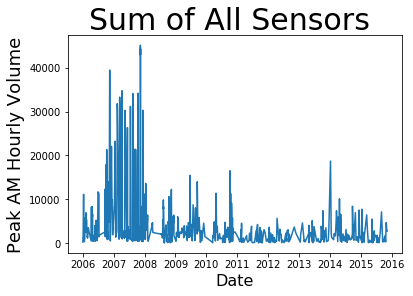

In [29]:
#plt.plot(grouped_df.index, grouped_df['Evening PM Peak Hourly Volume'])

fig = plt.figure()
plt.plot(grouped_df.index, grouped_df['Morning AM Peak Hourly Volume'])
fig.suptitle('Sum of All Sensors', fontsize=30)
plt.ylabel('Peak AM Hourly Volume', fontsize=18)
plt.xlabel('Date', fontsize=16)

In [30]:
#check to see if there are more sensors in 2007 than in other years\n",

#subset original to what I need\n",
df_datacheck = df_clean[['Main Location', 'Second Location', 'Year']]
df_datacheck2 = df_clean[['Evening PM Peak Hourly Volume', 'Year']]

#groupby main loc, second loc, and date time and count #groupby a list this time and .count()

grouped_dcheck = df_datacheck.groupby(['Year'])
grouped_dcheck.count()
                                 
#grouped_dcheck['Year'].count().to_csv('grouped_datacheck_count.csv')

,Main Location,Second Location
Year,,
2006,993,993
2007,1342,1342
2008,1048,1048
2009,822,822
2010,317,317
2011,242,242
2012,211,211
2013,256,256
2014,356,356


Text(0.5,0,'Date')

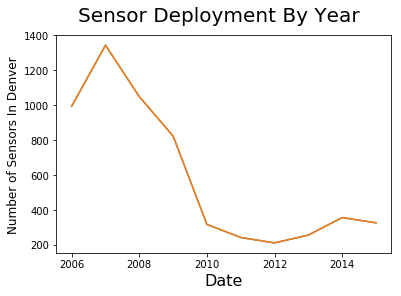

In [31]:
#line graph of sensor counts poer year
fig = plt.figure()
plt.plot(grouped_dcheck.count())
fig.suptitle('Sensor Deployment By Year', fontsize=20)
plt.ylabel('Number of Sensors In Denver', fontsize=12)
plt.xlabel('Date', fontsize=16)

Text(0.5,0,'Date')

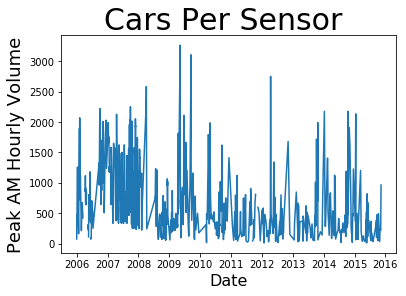

In [32]:
#cars per sensor location
grouped_df_mean = am_pm_df.groupby("Date Time").mean()
fig = plt.figure()
plt.plot(grouped_df_mean.index, grouped_df_mean['Evening PM Peak Hourly Volume'])
fig.suptitle('Cars Per Sensor', fontsize=30)
plt.ylabel('Peak AM Hourly Volume', fontsize=18)
plt.xlabel('Date', fontsize=16)

In [33]:
#moving average
grouped_df_mean.head()

,Morning AM Peak Hourly Volume,Evening PM Peak Hourly Volume
Date Time,,
2006-01-01,57.666667,75.000000
2006-01-02,111.333333,129.666667
2006-01-03,384.333333,474.000000
2006-01-04,400.666667,362.000000
2006-01-05,400.666667,372.000000


In [34]:
#convert index to column using reset index method
grouped_df_mean.reset_index(inplace=True)

In [35]:
grouped_df_mean.head()

,Date Time,Morning AM Peak Hourly Volume,Evening PM Peak Hourly Volume
0,2006-01-01,57.666667,75.000000
1,2006-01-02,111.333333,129.666667
2,2006-01-03,384.333333,474.000000
3,2006-01-04,400.666667,362.000000
4,2006-01-05,400.666667,372.000000


In [36]:
#moving average calculation: determine timedelta
#while date in grouped_df_mean['Date Time']
from datetime import datetime, timedelta
dt = datetime(2006, 1, 1, 0, 0, 0)
print(dt)
grouped_df_mean[grouped_df_mean['Date Time'].between(dt, dt + timedelta(7))]

#create empyt list carriers for datapoints
dates = []
moving_avgs = []

#moving average calculation: while loop (note: weeklong timedeltas did not flatted data very much, changed to year-sized rolling avg)
while dt < datetime(2014, 12, 31, 0, 0, 0):
    moving_avg = grouped_df_mean[grouped_df_mean['Date Time'].between(dt, dt + timedelta(365.25))].mean()['Morning AM Peak Hourly Volume']
    print(moving_avg)
    dates.append(dt)
    moving_avgs.append(moving_avg)
    dt = dt + timedelta(1)

print(dates, moving_avgs)

2006-01-01 00:00:00
742.4562220567548
747.1465614772349
751.5314802920204
754.081467423678
756.5528995968037
759.0591406737767
759.0591406737767
759.0591406737767
764.6053471492514
770.3893377940483
773.9307729792336
771.6107084546128
771.9761762203898
773.0752980375556
776.4567882616334
784.2506257966475
791.2133708946867
796.1339591299808
796.1339591299808
799.7104624330742
799.7104624330742
799.7104624330742
804.4875305585523
809.3067679304775
817.7780051251189
817.7780051251189
817.7780051251189
817.7780051251189
817.7780051251189
817.7780051251189
817.7780051251189
815.3878480188698
809.4793673091734
803.8693144152784
796.9304043015213
792.9041572743266
790.2301376664834
782.9593043331502
780.2316695292287
776.6941263405562
777.885873552053
777.885873552053
777.885873552053
782.3582165176899
786.5282168438067
788.8570270042344
788.8570270042344
788.8570270042344
788.8570270042344
788.8570270042344
788.8570270042344
788.8570270042344
788.8570270042344
788.8570270042344
793.19459228

857.9550836688175
862.7904481077996
867.6778508130559
872.5636449855301
877.5197383547305
882.5500746230016
882.5500746230016
882.5500746230016
887.2475204231695
884.9732709075644
882.6680224092366
880.3839981531319
885.5710958836065
885.5710958836065
885.5710958836065
885.5710958836065
883.1587557009066
880.9258708843741
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
878.4586339937412
883.8931970479562
886.8962688998934
891.1132998886064
895.4290139088863
900.7636460201574
898.8819239617964
897.1190741668216
895.5087688998933
890.251069624531
885.2090632839513
881.671168198546
881.671168198546
882.1346746969948
882.5134756683359
883.2326027785795
887.4556797016564
891.9749104708872
895.5987469861653
895.5987469861653
895.598746986

507.8709309079244
509.5793997194617
512.0223847753207
512.0223847753207
512.0223847753207
512.0223847753207
510.78225686231883
513.0887960141457
515.4027325357432
517.7500352442844
517.7500352442844
517.7500352442844
517.7500352442844
520.2339535790463
522.6804278157857
525.0427709126576
527.5999038083017
530.1064900586508
532.8501034525784
535.7906091300689
539.1900581658815
540.017436569332
540.8994453826407
541.7604501895294
542.5415709981601
543.9415467259894
545.8399784092289
547.9374626859585
547.8049466270088
547.3342400300284
546.8899270890444
547.6752384466081
548.6558135880363
550.159010626738
545.4939779469995
545.9684881897256
546.4182620745652
546.9793838217289
546.8232051896599
547.7871007202207
545.9569205400405
545.9569205400405
545.9569205400405
548.9226138770475
552.0453715063425
555.211201654662
558.5390572217083
563.0477377772638
563.0477377772638
563.0477377772638
563.0477377772638
563.0477377772638
563.0477377772638
563.0477377772638
560.3554545282253
560.11976936

436.1244404352264
436.1244404352264
436.1244404352264
436.1244404352264
438.4174640489186
438.4174640489186
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
440.78692178306727
427.8511068980345
427.8511068980345
427.8511068980345
398.50371218937994
398.50371218937994
398.50371218937994
398.50371218937994
398.50371218937994
398.50371218937994
398.50371218937994
394.01551367769554
394.01551367769554
394.01551367769554
394.01551367769554
396.9726777066213
396.9726777066213
396.9726777066213
397.3926323217633
397.3926323217633
397.3926323217633
393.7694217830673
368.36720859294974
368.36720859294974
368.36720859294974
368.36720859294974
368.36720859294974
368.36720859294974
368.36720859294974
364.28733287903515
364.28733287903515
364.28733287903515
359.5790729997295
359.5790729997295
359.5790729997295
359.5790729997295
359.5790729997295
359.8288689291

347.16762832578047
337.47135339968673
337.47135339968673
337.47135339968673
337.47135339968673
337.47135339968673
337.47135339968673
341.01907760114284
336.78462914154403
340.32036603442856
338.61228871601213
338.61228871601213
338.61228871601213
338.61228871601213
332.5578660344285
330.68253543508644
330.68253543508644
332.2905049233174
332.2905049233174
332.2905049233174
332.2905049233174
330.49631094529053
326.52971805971805
326.52971805971805
332.3568551629776
332.3568551629776
332.3568551629776
332.3568551629776
332.159718059718
332.159718059718
332.159718059718
337.53032455073264
337.53032455073264
337.53032455073264
337.53032455073264
337.53032455073264
337.53032455073264
337.53032455073264
337.2184563122063
337.2184563122063
337.2184563122063
337.2184563122063
341.37204048906176
341.37204048906176
347.0888239779544
347.0888239779544
347.0888239779544
347.0888239779544
347.0888239779544
347.0888239779544
347.0888239779544
344.67968673302005
342.0701341587705
342.0701341587705
34

314.20531914893616
314.20531914893616
314.20531914893616
314.20531914893616
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
323.1020833333333
354.6591836734694
354.6591836734694
354.6591836734694
354.6591836734694
354.6591836734694
354.6591836734694
354.6591836734694
354.6591836734694
352.20799999999997
358.5489795918367
358.5489795918367
358.5489795918367
358.5489795918367
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36870748299316
356.36

376.2950069953195
376.2950069953195
376.2950069953195
376.2950069953195
383.0644966484763
383.0644966484763
383.0644966484763
383.0644966484763
383.0644966484763
377.60542893772896
377.60542893772896
382.50622000448533
382.50622000448533
382.50622000448533
380.6360956043956
383.9922505925447
384.29047654268805
384.29047654268805
389.19813294548584
389.19813294548584
389.19813294548584
389.19813294548584
389.19813294548584
387.53406628627783
387.53406628627783
392.2170871938519
392.2170871938519
392.2170871938519
392.2170871938519
392.2170871938519
392.2170871938519
392.2170871938519
391.8214289377289
391.8214289377289
391.8214289377289
391.8214289377289
391.8214289377289
391.8214289377289
391.8214289377289
396.4198254466622
396.4198254466622
396.4198254466622
396.4198254466622
396.4198254466622
389.8558733821734
389.8558733821734
389.8346733821734
389.8346733821734
389.8346733821734
382.8575229236994
381.09423722644874
376.007553505195
376.007553505195
376.007553505195
376.007553505195

Text(0.5,0,'Date')

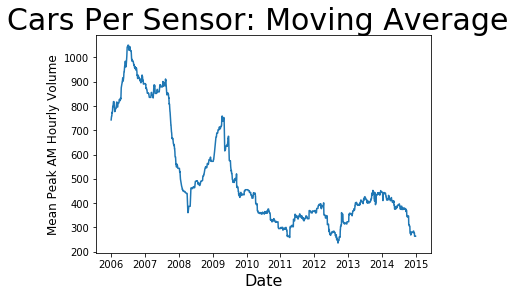

In [37]:
fig = plt.figure()
plt.plot(dates, moving_avgs)
fig.suptitle('Cars Per Sensor: Moving Average', fontsize=30)
plt.ylabel('Mean Peak AM Hourly Volume', fontsize=12)
plt.xlabel('Date', fontsize=16)

In [38]:
#find at least one location that is present in all years and graph
locations = df_clean[['Main Location', 'Second Location', 'Year']]
location_days = locations.groupby(['Year', 'Main Location', 'Second Location'])
location_days.count()

Empty DataFrame
Columns: []
Index: [(2006, 11TH AVE, UINTA), (2006, 11TH AVE, UINTA WAY), (2006, 13TH ST, FRANKLIN ST), (2006, 18TH , CALIFORNIA ST), (2006, 18TH , STOUT ST), (2006, 19TH , STOUT ST), (2006, 19TH AVE H.O.V., WYNKOOP ST), (2006, 19TH AVE H.O.V. (RTD STRIKE), WYNKOOP ST), (2006, 19TH AVE H.O.V./H.O.T., WYNKOOP ST), (2006, 1ST AVE, CLAYTON), (2006, 23RD AVE, HIGH ST), (2006, 2ND AVE, CLAYTON ), (2006, 2ND AVE, FILLMORE), (2006, 2ND AVE, MILWAUKEE), (2006, 2ND AVE, ST PAUL), (2006, 30TH AVE, ZUNI), (2006, 32ND AVE, CLAY ST), (2006, 38TH AVE, PERRY ST), (2006, 3RD AVE, DETROIT), (2006, 3RD AVE, MILWAUKEE), (2006, 3RD AVE, ST PAUL), (2006, 41ST AVE, ELIOT ST), (2006, 43RD AVE, TOWER RD), (2006, 48TH AVE, N TOWER RD), (2006, 7TH , CLARKSON), (2006, 7TH , DOWNING ST), (2006, 7TH , GRANT), (2006, 7TH , JOSEPHINE), (2006, 7TH , LOGAN ), (2006, 7TH , MARION), (2006, 7TH , OGDEN), (2006, 7TH , WASHINGTON ST), (2006, 7TH , YORK), (2006, ALAMEDA, BROADWAY), (2006, ALAMEDA, COLORADO BLVD ), (2006, ALAMEDA, KALAMATH), (2006, ALAMEDA, LINCOLN), (2006, ALAMEDA, SANTA FE), (2006, BROADWAY, CENTER), (2006, BROADWAY, LOUISIANA), (2006, BROADWAY, MISSISSIPPI), (2006, BROADWAY , ALAMEDA), (2006, BRUCE RANDOLPH, LAFAYETTE), (2006, CALIFORNIA , 18TH ST), (2006, CLARKSON ST, 7TH ), (2006, CLAY ST, 32ND AVE), (2006, CLAY ST, FLORIDA AVE), (2006, COLORADO BLVD, ALAMEDA), (2006, COLORADO BLVD, COLFAX AVENUE), (2006, COLORADO BLVD, EVANS), (2006, CORNELL, YOSEMITE ), (2006, CORONA, 7TH ), (2006, DETROIT, 2ND AVE), (2006, DETROIT, 3RD AVE), (2006, DOWNING ST, 33RD AVE), (2006, DOWNING ST, 7TH ), (2006, DTC BLVD, I-225), (2006, DUNKELD PL, ASHLAND REC CENTER), (2006, E 12TH AVE, CHEESMAN PARK), (2006, E 1ST AVE, CLAYTON), (2006, E 40TH AVE , N COLORADO BLVD), (2006, E 56TH AVE, HAVANA), (2006, E 56TH AVE, N CHAMBERS RD), (2006, E 7TH AVE, JOSEPHINE), (2006, E 9TH AVE, CHEESMAN PARK), (2006, E ALAMEDA AVE, N COLORADO BLVD), (2006, E ALAMEDA AVE, S LINCOLN ST), (2006, E EVANS AVE, I-25), (2006, E EVANS AVE, S BROADWAY BLVD), (2006, E EVANS AVE, S COLORADO BLVD), (2006, E EVANS AVE, S QUEBEC ST), (2006, E FLORIDA AVE, S HOLLY ST), (2006, E HAMPDEN AVE, S MONACO PARKWAY), (2006, E HAMPDEN AVE, YOSEMITE ), (2006, E HAMPDEN AVE , I-25), (2006, E LEETSDALE DRIVE, N QUEBEC ST), (2006, E SMITH RD, N FOREST ST), (2006, EVANS, I-25), (2006, EVANS, QUEBEC), (2006, EVANS AVE, COLORADO BLVD ), (2006, FILLMORE, 2ND AVE), (2006, FILLMORE, 3RD AVE), (2006, FLORIDA AVE, CLAY ST), (2006, FRANKLIN ST, 13TH ST), (2006, FRANKLIN ST, 14TH ST), (2006, GRANT ST, 7TH ), (2006, HIGH ST, 23RD AVE), (2006, HUMBOLDT ST, 23RD AVE), (2006, I-25 OFF RAMP, E EVANS AVE), (2006, I-25 OFF RAMP, E HAMPDEN AVE ), (2006, I-25 OFF RAMP, S BROADWAY BLVD), (2006, JOSEPHINE ST, 7TH ), (2006, KALAMATH, ALAMEDA), (2006, LINCOLN, ALAMEDA), (2006, LINCOLN , CENTER), (2006, LOGAN, 7TH ), (2006, MILWAUKEE, 1ST AVE), (2006, MILWAUKEE, 2ND AVE), (2006, MILWAUKEE, 3RD AVE), (2006, MONTVIEW, DEXTER), ...]

[1354 rows x 0 columns]

In [39]:
#Clean Up Data

df_clean['Main Location'] = df_clean['Main Location'].map(lambda x: x.upper())
df_clean['Second Location'] = df_clean['Second Location'].map(lambda x: x.upper())
# remove characters 
#df_clean['Main Location'] = df_clean['Main Location'].map(lambda x: x.translate(None,s.punctuation))
df_clean['Dual_Location'] = df_clean['Main Location'].map(lambda x: x.lstrip('W '))
df_clean['Dual_Location'] = df_clean['Dual_Location'].map(lambda x: x.lstrip('E '))
df_clean['Dual_Location'] = df_clean['Dual_Location'].map(lambda x: x.lstrip('N '))
df_clean['Dual_Location'] = df_clean['Dual_Location'].map(lambda x: x.lstrip('S '))
df_clean['Dual_Location'] = df_clean['Dual_Location'].map(lambda x: x.rstrip('NUE'))

#start with smallest year, 2012. Slice it off the values in that series
test = df_clean.loc[df_clean['Year'] == 2012]

locations = list(test['Dual_Location'].unique())

df_2 = df_clean[df_clean.Dual_Location.isin(locations)]

df_2[df_2['Year'] ==2015].Dual_Location.value_counts().head()

MORRISON RD    12
LOWELL BLVD     4
Name: Dual_Location, dtype: int64

In [40]:
#Case Study of one street
#subset of only Colorado blvd in either main or secondary location columns
search = 'COLORADO'

colorado_blvd = df_clean.loc[(df_clean['Main Location'].str.contains(search)) | (df_clean['Second Location'].str.contains(search))]
colorado_blvd['Second Location'].value_counts().head()

COLORADO BLVD      123
ALAMEDA             97
COLFAX AVENUE       90
EVANS               48
N COLORADO BLVD     38
Name: Second Location, dtype: int64

In [41]:
#Alameda appeared most frequently as a sensor location intersecting with Colorado 
#so trying this location as case study instead of the whole street
colo_alameda = df_clean.loc[(df_clean['Main Location'].str.contains(search)) | (df_clean['Second Location'].str.contains('ALAMEDA'))]

colo_alameda.head()


,Main Location,Second Location,Last day of the study,Morning AM Peak Hourly Volume,Evening PM Peak Hourly Volume,Annual Daily Traffic,Average Weekday Traffic,Average Weekend Traffic,Master ID,Date Time,Month,Year,Year-Month,Dual_Location
1329,BROADWAY,ALAMEDA,12/6/2007,2006.0,3813.0,NaN,NaN,NaN,NaN,2007-12-06,12,2007,2007-12,BROADWAY
1330,BROADWAY,ALAMEDA,12/5/2007,2041.0,3683.0,NaN,NaN,NaN,NaN,2007-12-05,12,2007,2007-12,BROADWAY
1331,BROADWAY,ALAMEDA,12/4/2007,1984.0,3853.0,NaN,NaN,NaN,NaN,2007-12-04,12,2007,2007-12,BROADWAY
1332,BROADWAY,ALAMEDA,11/15/2007,1996.0,3573.0,NaN,NaN,NaN,NaN,2007-11-15,11,2007,2007-11,BROADWAY
1335,BROADWAY,ALAMEDA,11/14/2007,2014.0,3617.0,NaN,NaN,NaN,NaN,2007-11-14,11,2007,2007-11,BROADWAY


In [42]:
#convert Year-Month to datetime object
colo_alameda['Year-Month'] = pd.to_datetime(colo_alameda['Year-Month'])
colo_alameda['Year-Month'].dtype

C:\Users\BranD\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('<M8[ns]')

(array([732312., 732677., 733042., 733408., 733773., 734138., 734503.,
        734869., 735234., 735599., 735964.]),
 <a list of 11 Text xticklabel objects>)

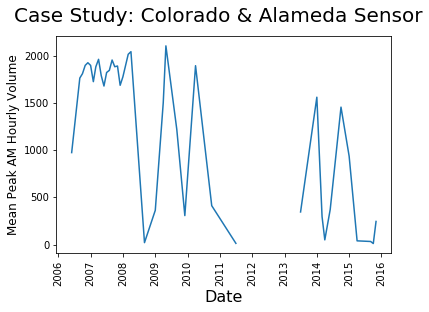

In [43]:
#case study: Colorado Blvd. & Alameda

#subset data to what's needed, groupby date, find the mean volume (cars per sensor)

case_df = colo_alameda[['Year-Month', 'Morning AM Peak Hourly Volume', 'Evening PM Peak Hourly Volume']]

case_df_mean = case_df.groupby(['Year-Month']).mean()

case_df_mean

fig = plt.figure()
plt.plot(case_df_mean.index, case_df_mean['Morning AM Peak Hourly Volume'])
fig.suptitle('Case Study: Colorado & Alameda Sensor', fontsize=20)
plt.ylabel('Mean Peak AM Hourly Volume', fontsize=12)
plt.xlabel('Date', fontsize=16)
plt.xticks(rotation=90)


In [44]:
#View case study with moving average

dt = datetime(2006, 1, 1, 0, 0, 0)
case_df[case_df['Year-Month'].between(dt, dt + timedelta(7))]

#create empyt lists as carriers for datapoints
case_dates = []
case_moving_avgs = []

#moving average calculation: while loop (note: weeklong timedeltas did not flatten the data enough;
                                                                #changed to year-sized rolling window)
while dt < datetime(2015, 10, 31, 0, 0, 0):
    case_moving_avg = case_df[case_df['Year-Month'].between(dt, dt + timedelta(1000))].mean()['Morning AM Peak Hourly Volume']
    #print(case_moving_avgs)
    case_dates.append(dt)
    case_moving_avgs.append(case_moving_avg)
    dt = dt + timedelta(1)

Text(0.5,0,'Date')

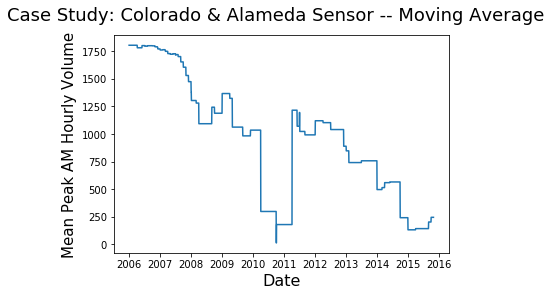

In [45]:
fig = plt.figure()
plt.plot(case_dates, case_moving_avgs)
fig.suptitle('Case Study: Colorado & Alameda Sensor -- Moving Average', fontsize=18)
plt.ylabel('Mean Peak AM Hourly Volume', fontsize=15)
plt.xlabel('Date', fontsize=16)

Text(0.5,0,'Date')

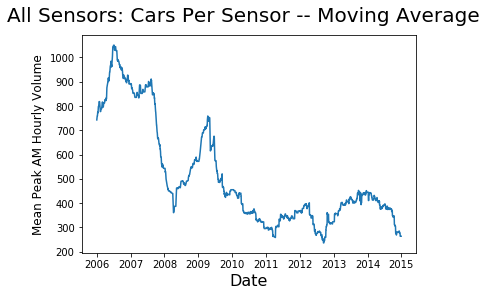

In [46]:
fig = plt.figure()
plt.plot(dates, moving_avgs)
fig.suptitle('All Sensors: Cars Per Sensor -- Moving Average', fontsize=20)
plt.ylabel('Mean Peak AM Hourly Volume', fontsize=12)
plt.xlabel('Date', fontsize=16)